<h2>1. Data Setup</h2>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# a. read in the data
df = pd.read_csv('loan_data.csv')
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [4]:
# drop the index column --> there was a problem with including index into the read in call so decided to do this
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,int_rate,grade,home_ownership,annual_inc,loan_status,loan_amnt,purpose
0,13.56,C,RENT,55000.0,Current,2500,debt_consolidation
1,18.94,D,MORTGAGE,90000.0,Current,30000,debt_consolidation
2,17.97,D,MORTGAGE,59280.0,Current,5000,debt_consolidation
3,18.94,D,MORTGAGE,92000.0,Current,4000,debt_consolidation
4,16.14,C,MORTGAGE,57250.0,Current,30000,debt_consolidation


In [5]:
# b. drop NaNs
df = df.dropna()

In [6]:
# c. and d. Create the target and check if it's evenly distributed between True and False (True = 1 = bad credit risk)
target = np.where(np.logical_or(df['loan_status'] == 'Default', df['loan_status'].str.contains('Charged Off')),1,0)
np.unique(target, return_counts=True)

(array([0, 1]), array([1998217,  262447], dtype=int64))

<li>The values are not evenly distributed between True and False</li>

In [7]:
# e. create input features
df.drop('loan_status', axis=1, inplace=True)
df.head()

,int_rate,grade,home_ownership,annual_inc,loan_amnt,purpose
0,13.56,C,RENT,55000.0,2500,debt_consolidation
1,18.94,D,MORTGAGE,90000.0,30000,debt_consolidation
2,17.97,D,MORTGAGE,59280.0,5000,debt_consolidation
3,18.94,D,MORTGAGE,92000.0,4000,debt_consolidation
4,16.14,C,MORTGAGE,57250.0,30000,debt_consolidation


In [8]:
from sklearn import preprocessing

In [9]:
# f. convert grade, home_ownership, and purpose into integers
le_grade = preprocessing.LabelEncoder()
le_home_ownership = preprocessing.LabelEncoder()
le_purpose = preprocessing.LabelEncoder()
df['grade'] = le_grade.fit_transform(df['grade']).astype('int64')
df['home_ownership'] = le_home_ownership.fit_transform(df['home_ownership']).astype('int64')
df['purpose'] = le_purpose.fit_transform(df['purpose']).astype('int64')

In [10]:
df.head()

,int_rate,grade,home_ownership,annual_inc,loan_amnt,purpose
0,13.56,2,5,55000.0,2500,2
1,18.94,3,1,90000.0,30000,2
2,17.97,3,1,59280.0,5000,2
3,18.94,3,1,92000.0,4000,2
4,16.14,2,1,57250.0,30000,2


In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260664 entries, 0 to 2260667
Data columns (total 6 columns):
int_rate          2260664 non-null float64
grade             2260664 non-null int64
home_ownership    2260664 non-null int64
annual_inc        2260664 non-null float64
loan_amnt         2260664 non-null int64
purpose           2260664 non-null int64
dtypes: float64(2), int64(4)
memory usage: 120.7 MB


<h2>2. Build a predictive model using the SGDClassifier</h2>

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [13]:
# a. b. c. d. transform input dataframe into a numpy array with floats with mean 0 and std 1, 
# and with categorical variables dummified
preprocess = make_column_transformer(
    (StandardScaler(), ['int_rate', 'annual_inc']),
    (OneHotEncoder(categories="auto",drop="first"), ['grade', 'home_ownership', 'purpose'])
)
input_features = preprocess.fit_transform(df).toarray()

In [14]:
# a. b. input and output feature shapes
input_features.shape, target.shape

((2260664, 26), (2260664,))

<h4>Fit a SGDClassifier</h4>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# 1. 2. split data into 70% training and 30% testing and align the data
df1 = pd.DataFrame(np.append(input_features,target.reshape(len(input_features),1),axis=1))
train, test = train_test_split(df1, test_size = 0.3, random_state=3456)

In [17]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.096661,-0.204021,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.210046,0.106548,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.009306,-0.166043,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.210046,0.124295,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.630589,-0.184056,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train.index = range(0,len(train))

In [19]:
# 3. shuffle the training data and also display training shape
train = train.sample(frac=1.0,random_state=42)
X_train = train.iloc[:, 0:26]
y_train = train.iloc[:, 26]
print(X_train.shape)
print(y_train.shape)

(1582464, 26)
(1582464,)


In [20]:
# 4. testing shape
X_test = test.iloc[:, 0:26]
y_test = test.iloc[:, 26]
print(X_test.shape)
print(y_test.shape)

(678200, 26)
(678200,)


In [21]:
# reset training indices
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
# 5. fit SGD classifier to the training data
sgd_clf = SGDClassifier(random_state=42, max_iter=100)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
# 6. Print training and testing accuracy scores
print("Train sample accuracy:",sgd_clf.score(X_train,y_train))
print("Test sample accuracy :",sgd_clf.score(X_test,y_test))

Train sample accuracy: 0.8838349561190649
Test sample accuracy : 0.8840754939545856


In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
# 7. get predicted y's
y_pred_train = cross_val_predict(sgd_clf, X_train, y_train, cv=5, method='decision_function')
y_pred_train

array([-1.00352601, -1.00505833, -1.00323899, ..., -1.0060357 ,
       -1.0032564 , -1.00443825])

In [27]:
from matplotlib import pyplot as plt

In [28]:
def draw_precision_recall_curve(y_act,y_pred,title,ax=None):
    from sklearn.metrics import precision_recall_curve
    from matplotlib import pyplot as plt
    ax = ax or plt.gca()
    precision,recall,thresholds = precision_recall_curve(y_act,y_pred)
    ax.plot(thresholds,precision[:-1],label="precision")
    ax.plot(thresholds,recall[:-1],label="recall")
    ax.set_title(title)
    ax.set_xlabel("threshold")
    ax.set_ylabel("precision/recall")
    ax.legend(["precision","recall"],loc="upper right")

In [29]:
def draw_roc_curve(y_actual,y_predicted,title,ax=None):
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib import pyplot as plt
    ax = ax or plt.gca()
    fpr,tpr,thresholds = roc_curve(y_actual,y_predicted)

    area = roc_auc_score(y_actual,y_predicted)
    ax.plot(fpr,tpr,label= "ROC Curve with area = %1.2f"%area)

    ax.plot([0, 1], [0, 1], 'k')
    #ax.xlim([0.0, 1.0])
    #ax.ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")

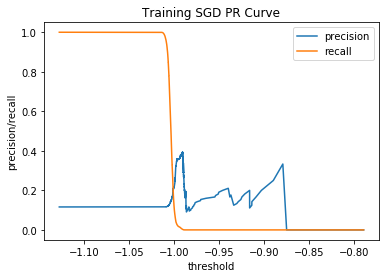

In [30]:
# draw Precision-Recall Curve
draw_precision_recall_curve(y_train, y_pred_train, 'Training SGD PR Curve')

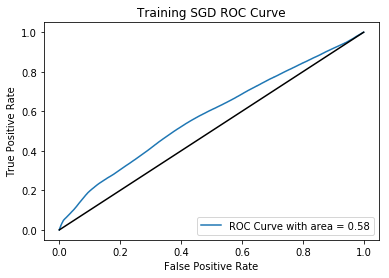

In [31]:
# draw ROC curve
draw_roc_curve(y_train, y_pred_train, 'Training SGD ROC Curve')

<h4>Run a grid search on the SGD Classifier</h4>

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# 1. 2. run a gridsearch with 5 folds
parameters = {
    'loss':('modified_huber', 'hinge'),
    'penalty':('elasticnet', 'l2')
}
sgd_gs_clf = GridSearchCV(SGDClassifier(random_state=42, max_iter=100), parameters, cv=5, iid=False)
sgd_gs_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=100,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'loss': ('modified_huber', 'hinge'),
                         'penalty': ('elasticnet', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [33]:
# display the hyperparameters with the best score
sgd_gs_clf.best_score_, sgd_gs_clf.best_params_

(0.8838349561227437, {'loss': 'hinge', 'penalty': 'elasticnet'})

In [32]:
# 3. build an SGD classifier using the best hyperparameters
sgd_clf1 = SGDClassifier(random_state=42, max_iter=100, loss='hinge', penalty='elasticnet')
sgd_clf1.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
# find the new predicted y's
y_pred_train1 = cross_val_predict(sgd_clf1, X_train, y_train, cv=5, method='decision_function')
y_pred_train1

array([-1.0016186 , -0.99989194, -1.00052384, ..., -1.0028896 ,
       -1.00210351, -1.00395864])

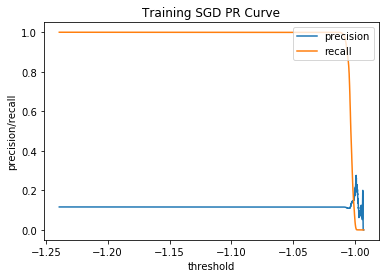

In [34]:
# draw the new Precision-Recall Curve
draw_precision_recall_curve(y_train, y_pred_train1, 'Training SGD PR Curve')

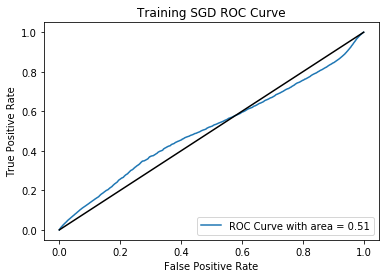

In [35]:
# draw the new ROC curve
draw_roc_curve(y_train, y_pred_train1, 'Training SGD ROC Curve')

<h2>3. Build a predictive model using RandomForestClassifier</h2>

In [36]:
# 3. split data into training and testing
df2 = pd.DataFrame(np.append(df,target.reshape(len(input_features),1),axis=1), columns=np.append(df.columns.values, 'target'))
train1, test1 = train_test_split(df2, test_size = 0.3, random_state=3456)

In [37]:
# 4. shuffle the training data and also display training shape
train1 = train1.sample(frac=1.0,random_state=42)
X_train1 = train1.iloc[:, 0:6]
y_train1 = train1.iloc[:, 6]
print(X_train1.shape)
print(y_train1.shape)

(1582464, 6)
(1582464,)


In [38]:
# 5. testing shape
X_test1 = test1.iloc[:, 0:6]
y_test1 = test1.iloc[:, 6]
print(X_test1.shape)
print(y_test1.shape)

(678200, 6)
(678200,)


<h4>Fit the RandomForestClassifier</h4>

In [39]:
# reset training indices
X_train1.index=range(len(X_train1))
y_train1.index=range(len(y_train1))

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# 6. build the RF Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [42]:
# 7. display training and testing accuracy scores
print("Train sample accuracy:",rf_clf.score(X_train1,y_train1))
print("Test sample accuracy :",rf_clf.score(X_test1,y_test1))

Train sample accuracy: 0.9609210699263933
Test sample accuracy : 0.8596387496313772


In [43]:
# 8. get predicted y's
y_pred_train2 = rf_clf.predict_proba(X_train1)[:,-1]
y_pred_train2

array([0. , 0. , 0.1, ..., 0. , 0. , 0. ])

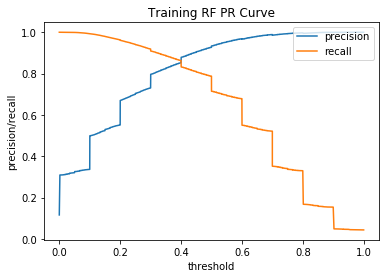

In [44]:
# draw the Precision-Recall Curve
draw_precision_recall_curve(y_train1, y_pred_train2, 'Training RF PR Curve')

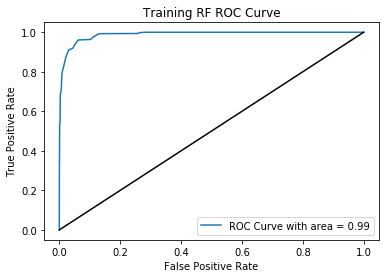

In [45]:
# draw the ROC Curve
draw_roc_curve(y_train1, y_pred_train2, 'Training RF ROC Curve')

<h4>Run a grid search on the classifier</h4>

In [49]:
# 1. 2. 3. vary n_estimators, min_samples_split, with cv 5
parameters = {
     'n_estimators':(100, 200),
     'min_samples_split': (100, 400),
}

rf_gs_clf = GridSearchCV(RandomForestClassifier(random_state=42),parameters,cv=5,iid=False)
rf_gs_clf.fit(X_train1, y_train1)
rf_gs_clf.best_score_, rf_gs_clf.best_params_

(0.8838299007945472, {'min_samples_split': 400, 'n_estimators': 200})

In [46]:
# fit the classifier
rf_clf1 = RandomForestClassifier(random_state=42, n_estimators=200, min_samples_split=400)
rf_clf1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
# 4. get predicted y's using the best model found
y_pred_train3 = rf_clf1.predict_proba(X_train1)[:,-1]
y_pred_train3

array([0.08518665, 0.16128786, 0.18921043, ..., 0.01692143, 0.02560257,
       0.0083198 ])

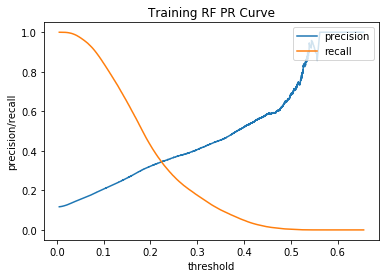

In [48]:
# draw the Precision-Recall Curve
draw_precision_recall_curve(y_train1, y_pred_train3, 'Training RF PR Curve')

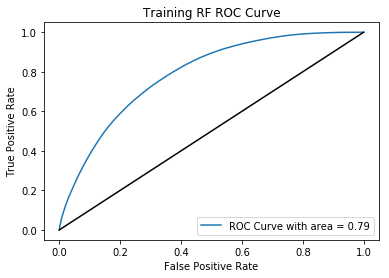

In [49]:
# draw the ROC Curve
draw_roc_curve(y_train1, y_pred_train3, 'Training RF ROC Curve')

<h2>4. Analysis</h2>

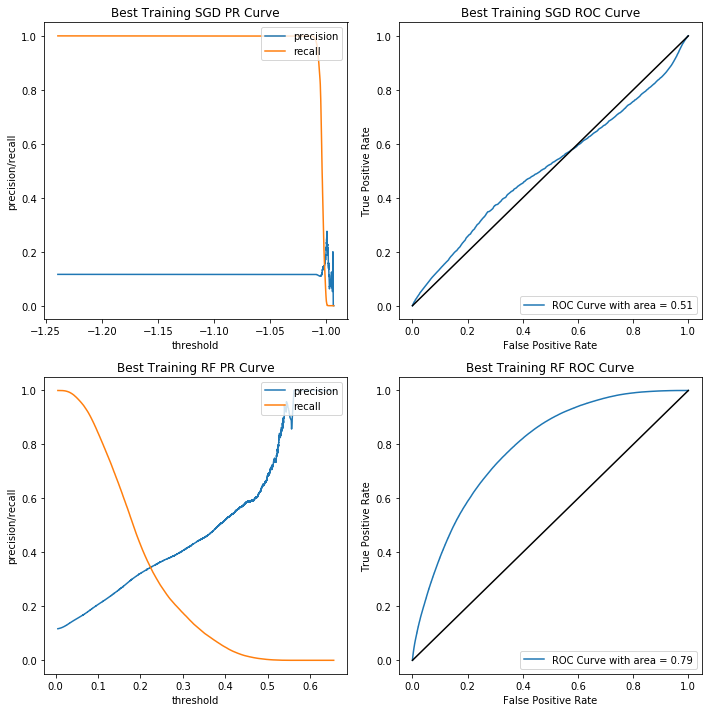

In [62]:
# training Precision-Recall and ROC Curves
fig, ax = plt.subplots(2, 2, figsize=(10,10))
draw_precision_recall_curve(y_train, y_pred_train1, 'Best Training SGD PR Curve', ax=ax[0][0])
draw_roc_curve(y_train, y_pred_train1, 'Best Training SGD ROC Curve', ax=ax[0][1])
draw_precision_recall_curve(y_train1, y_pred_train3, 'Best Training RF PR Curve', ax=ax[1][0])
draw_roc_curve(y_train1, y_pred_train3, 'Best Training RF ROC Curve', ax=ax[1][1])
plt.tight_layout()

In [61]:
# find the predicted y's from the testing data with the best SGD Classifier
y_pred_test = cross_val_predict(sgd_clf1, X_test, y_test, cv=5, method='decision_function')
y_pred_test

array([-1.00471413, -1.00347669, -0.9988828 , ..., -1.00161618,
       -1.0014873 , -0.99744487])

In [60]:
# find the predicted y's from the testing data with the best RF Classifier
y_pred_test1 = rf_clf1.predict_proba(X_test1)[:,-1]
y_pred_test1

array([0.14522677, 0.14483808, 0.19748882, ..., 0.13183982, 0.07023915,
       0.01569025])

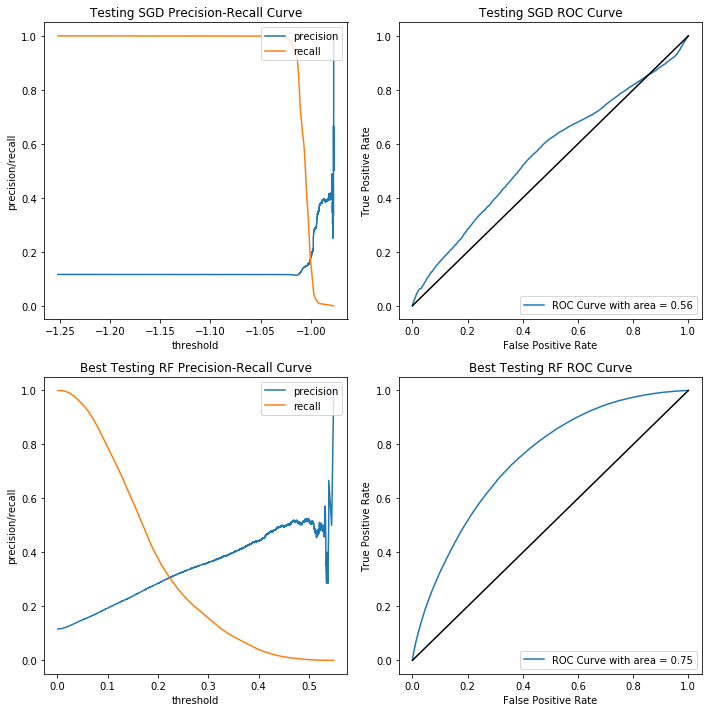

In [63]:
# testing Precision-Recall and ROC Curves
fig, ax = plt.subplots(2, 2, figsize=(10,10))
draw_precision_recall_curve(y_test, y_pred_test, 'Testing SGD Precision-Recall Curve', ax=ax[0][0])
draw_roc_curve(y_test, y_pred_test, 'Testing SGD ROC Curve', ax=ax[0][1])
draw_precision_recall_curve(y_test1, y_pred_test1, 'Best Testing RF Precision-Recall Curve', ax=ax[1][0])
draw_roc_curve(y_test1, y_pred_test1, 'Best Testing RF ROC Curve', ax=ax[1][1])
plt.tight_layout()

<li>To start off, in both cases of training and testing data, I hypothesized that the Random Forest Classifier model would be more successful than the SGD Classifier model. Specifically, in both cases the RF Classifier model had a much higher area under curve for the ROC curve, implying that there was a much better ratio of true positives to false positives than in the SGD Classifier, regardless of the threshold. Additionally, in both the training and testing cases of the Precision-Recall Curves the value of the precision was higher throughout in the RF Classifier than in the SGD Classifier which is important because we want to minimize the number of false positives so that we do not give out bad loans, meaning that a higher precision is better. Additionally, the points at which the curves intersect in the Precision-Recall Curves have higher precision/recall values in the RF Classifier than in the SGD Classifier, implying that overall, the tradeoff between precision and recall is also better in the RF Classifier. Overall, I believe that this analysis supports the hypothesis that the RF Classifier is a better model than the SGD Classifier.</li>